In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing  dataframe using file location
df = pd.read_csv("C:\\Users\\HP\\Desktop\\python\\udemy_py\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
# basic data exploration
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# creating a new feature 'Total spend' by adding 3 existing features 
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

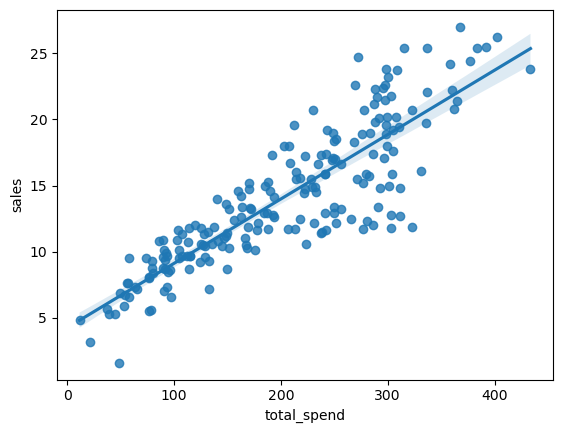

In [7]:
sns.regplot(data = df, x= 'total_spend', y = 'sales')

# regplot uses ols to add best fit this regression line visually 

# Simple Linear  Reg using np.polyfit()
### straight line equation = y = mx + b
### simple linear regression equation = y =  B0 + B1X 

positive regression fit, the more we spend on add the more is our sales

In [11]:
# splitting the data into feature (x) and target(y)
x = df['total_spend']
y = df['sales']

In [9]:
# np.polyfit()  is a numpy fucntion to perform simple linear regression
    
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [12]:
# fitting the model with x, y variable and deg = degree of polynomial 
B1,B0 = np.polyfit(x,y,deg = 1)
print('B1: ', B1)
print('B0: ', B0)
# output is sequence of B1 and BO

B1:  0.048687879319048145
B0:  4.2430282160363255


In [13]:
spend = np.linspace(0,500,100)

In [14]:
# predicting new values using B0 & B1
pred_sale = B1*spend + B0

<Axes: xlabel='total_spend', ylabel='sales'>

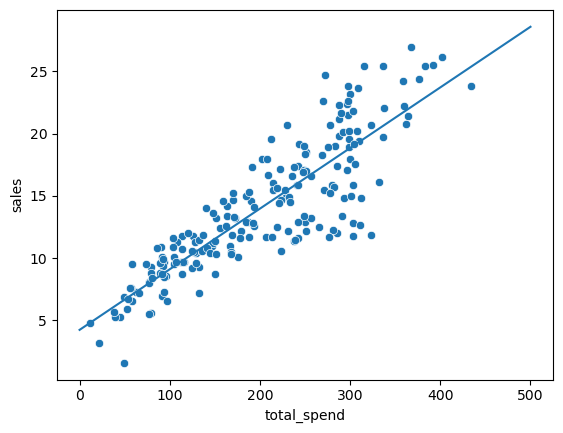

In [15]:
plt.plot(spend, pred_sale)
sns.scatterplot(data = df, x = 'total_spend', y ='sales')

In [16]:
new_spend = 400
predicted_spend = B1*new_spend + B0
predicted_spend

23.718179943655585

# Simple Linear Reg using statsmodels

In [2]:
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\python\\udemy_py\\08-Linear-Regression-Models\\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [13]:
df.corr()

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


In [14]:
model = smf.ols("total_spend~sales", data = df).fit()

In [15]:
model

In [16]:
model.params

Intercept   -15.987839
sales        15.464314
dtype: float64

In [17]:
model.pvalues

Intercept    9.110366e-02
sales        5.059270e-62
dtype: float64

In [18]:
model.rsquared

0.7529246402599598

In [19]:
model.rsquared_adj

0.7516767849077374